# Explanatory Analysis Practice with a Covid19 dataset

# Import required packages

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pylab as plt
import plotly.express as px
from datetime import datetime

# Import a dataset ("time_series_covid19_recovered_global.csv") for Explanatory Analysis

Dataset can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [2]:
file = files.upload()
df = pd.read_csv("time_series_covid19_confirmed_US.csv")
df.head()

Saving time_series_covid19_confirmed_US.csv to time_series_covid19_confirmed_US.csv


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11018,11018,11184,11256,11347,11478,11638,11789,11856,11975,12029,12102,12180,12180,12180,12180,12624,12682,12738,12833,12928,13019,13133,13191,13251,13320,13251,13251,13703,14291,14498,14742,14782,14826,14826,14970,14999,14999,15046,15089
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39911,39911,40396,40549,40838,41312,41855,42391,42738,43285,43583,43896,44353,44353,44353,44353,46528,46893,47143,47662,48338,49168,49682,50003,50313,50660,50313,50313,51924,52255,52459,52649,52881,53083,53083,53559,53637,53637,53768,53992
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3860,3860,3932,3961,3999,4036,4101,4150,4180,4263,4305,4375,4437,4437,4437,4437,4684,4713,4741,4800,4843,4902,4993,5025,5054,5053,5054,5054,5192,5224,5241,5263,5276,5297,5297,5338,5346,5346,5356,5372
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4533,4533,4576,4594,4616,4680,4730,4815,4857,4914,4939,5007,5046,5046,5046,5046,5274,5302,5385,5486,5565,5663,5747,5779,5795,5827,5795,5795,6006,6049,6088,6107,6130,6158,6158,6204,6208,6208,6224,6244
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11256,11256,11338,11368,11430,11497,11587,11690,11749,11828,11893,11965,12068,12068,12068,12068,12520,12579,12648,12825,13005,13131,13259,13362,13427,13485,13427,13427,13837,13930,13981,14056,14096,14158,14158,14299,14329,14329,14366,14417


# Explanatory Analysis

## Basic statistics about this dataset

Check the numbers of rows and columns - 3342 rows & 759 columns

In [4]:
df.shape

(3342, 760)

Find column names

In [5]:
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '1/30/22', '1/31/22', '2/1/22', '2/2/22', '2/3/22', '2/4/22', '2/5/22',
       '2/6/22', '2/7/22', '2/8/22'],
      dtype='object', length=760)

Find column types

In [6]:
df.dtypes

UID         int64
iso2       object
iso3       object
code3       int64
FIPS      float64
           ...   
2/4/22      int64
2/5/22      int64
2/6/22      int64
2/7/22      int64
2/8/22      int64
Length: 760, dtype: object

Show the basic statistics about each of the numeric columns

In [7]:
df.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,0.000299,0.000299,0.000598,0.000598,0.001496,0.001496,0.001496,0.001795,0.001795,0.002394,0.002394,0.002394,0.003291,0.003291,0.003291,0.003591,0.003591,0.003591,0.003591,0.003591,0.003890,0.003890,0.004189,0.004189,0.004189,0.004189,0.004488,0.004788,0.004788,0.004788,0.004788,0.004788,0.004788,0.005087,0.005386,...,1.639647e+04,1.644637e+04,1.653760e+04,1.685991e+04,1.710122e+04,1.729434e+04,1.753828e+04,1.779478e+04,1.791042e+04,1.805315e+04,1.846297e+04,1.869354e+04,1.896594e+04,1.921752e+04,1.947478e+04,1.959289e+04,1.973303e+04,1.993122e+04,2.026447e+04,2.056337e+04,2.077611e+04,2.102234e+04,2.110810e+04,2.121471e+04,2.148502e+04,2.165111e+04,2.184611e+04,2.199220e+04,2.217214e+04,2.222281e+04,2.228051e+04,2.243952e+04,2.256341e+04,2.266054e+04,2.273567e+04,2.284681e+04,2.287796e+04,2.289402e+04,2.299604e+04,2.305551e+04
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,0.017298,0.017298,0.024459,0.024459,0.038656,0.038656,0.038656,0.042340,0.042340,0.054657,0.054657,0.054657,0.071256,0.071256,0.071256,0.073312,0.073312,0.073312,0.073312,0.073312,0.075311,0.075311,0.081039,0.081039,0.077257,0.077257,0.079154,0.081006,0.081006,0.081006,0.081006,0.081006,0.081006,0.082815,0.088052,...,5.456553e+04,5.478278e+04,5.541196e+04,5.644957e+04,5.714766e+04,5.785052e+04,5.883185e+04,6.035170e+04,6.096247e+04,6.181360e+04,6.303911e+04,6.396056e+04,6.497054e+04,6.602313e+04,6.692866e+04,6.789640e+04,6.865117e+04,6.948947e+04,7.029439e+04,7.117980e+04,7.199381e+04,7.313269e+04,7.370121e+04,7.427325e+04,7.500137e+04,7.548869e+04,7.600383e+04,7.651856e+04,7.718297e+04,7.750851e+04,7.783080e+04,7.819858e+04,7.847195e+04,7.879409e+04,7.903620e+04,7.945548e+04,7.960738e+04,7.972670e+04,7.991623e+04,8.005482e+04
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

Find the number of Null values in each column

In [8]:
df.isnull().sum()

UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
2/4/22     0
2/5/22     0
2/6/22     0
2/7/22     0
2/8/22     0
Length: 760, dtype: int64

Show only the columns with Null values

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

FIPS      10
Admin2     6
dtype: int64

Below are the descriptions of the columns above:

- FIPS: Federal Information Processing Standards code that uniquely identifies counties within the USA.

- Admin2: County name. US only.

Reference: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Show the rows with Null values in the Admin2 columns

In [10]:
df[df['Admin2'].isnull()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22
102,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
338,84088888,US,USA,840,88888.0,NaN,Diamond Princess,US,0.0000,0.0000,"Diamond Princess, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
572,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,"Grand Princess, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
573,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19607,19618,19618,19689,19899,20088,20351,20594,20688,20809,21118,21540,22056,22479,23115,23115,23318,23581,24218,25033,25757,26851,26851,26851,27869,28628,29478,30221,31038,31804,31804,32331,33108,33788,34610,35372,35769,36113,36612,37456
2123,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3255,3287,3297,3297,3392,3453,3518,3561,3598,3598,3665,3698,3751,3802,3868,3905,3946,3971,4014,4067,4119,4166,4208,4246,4265,4344,4440,4564,4692,4772,4864,4908,5280,5314,5575,5687,5891,6102,6332,6563
3009,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9648,10106,10106,10290,10714,11160,11833,12138,12541,12541,12605,12953,13110,13401,13521,13521,13760,13760,13901,14028,14158,14301,14398,14398,14478,14521,14689,14756,14802,14802,14846,14870,14903,14935,14963,14988,15024,15024,15045,15098


American Samoa, Guam, Northern Mariana Islands, and Virgin Islands are the territories of the U.S. and do not have conties. They are considered as "county equivalent."

Diamond Princess and Grand Princess	are actually the names of cruise ships, and therefore they should be excluded from this county-level dataset.

References:
- https://en.wikipedia.org/wiki/County_(United_States)
- https://en.wikipedia.org/wiki/Territories_of_the_United_States
- https://www.princess.com/ships-and-experience/ships/di-diamond-princess/
- https://www.princess.com/ships-and-experience/ships/ap-grand-princess/

## Data Cleaning

### Data Cleaning #1

Exclude the rows for Diamond Princess and Grand Princess

In [11]:
df = df[df['Province_State'] != 'Diamond Princess']
df = df[df['Province_State'] != 'Grand Princess']

Confirm that the rows for Diamond Princess and Grand Pricess are successfully excluded

In [12]:
df.shape

(3340, 760)

For the simplicity of this analysis, I will replace NaNs in the Admin2 column with their respective territories names (values in the Province_State column).

In [13]:
df['Admin2'].fillna(df['Province_State'], inplace=True)

Confirm that there is no NaN in the Admin2 column anymore

In [14]:
df[df['Admin2'].isnull()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22


### Data Cleaning #2

While obsearving the dataset, I noticed that the Admin2 (County name) column includes the values that are not county names or county equivalent such as "Unassigned" or "Out of Al".

For the purpose of analysis at the county level, it is better not to include such values, and I will exclude them for the purpose of my analysis.

Fortunately, this dataset includes a column "FIPS", which shows a Federal Information Processing Standards code that uniquely identifies counties within the USA. Since the maximum value of FIPS is 78030, I can exclude all rows where FIPS is above 78030.

I will keep the original dataframe ("df") and create the new dataframe as "df_valid_counties".

References:
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
- https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697

Confirm that the rows with FIPS > 78030 are the invalid counties. 

In [15]:
df.loc[df.FIPS > 78030, 'Admin2'].value_counts()

Unassigned    51
Out of AL      1
Out of NE      1
Out of NV      1
Out of NH      1
Out of NJ      1
Out of NM      1
Out of NY      1
Out of NC      1
Out of ND      1
Out of OH      1
Out of OK      1
Out of OR      1
Out of PA      1
Out of RI      1
Out of SC      1
Out of SD      1
Out of TN      1
Out of TX      1
Out of UT      1
Out of VT      1
Out of VA      1
Out of WA      1
Out of WV      1
Out of WI      1
Out of MT      1
Out of MO      1
Out of MS      1
Out of HI      1
Out of AK      1
Out of AZ      1
Out of AR      1
Out of CA      1
Out of CO      1
Out of CT      1
Out of DE      1
Out of DC      1
Out of FL      1
Out of GA      1
Out of ID      1
Out of MN      1
Out of IL      1
Out of IN      1
Out of IA      1
Out of KS      1
Out of KY      1
Out of LA      1
Out of ME      1
Out of MD      1
Out of MA      1
Out of MI      1
Out of WY      1
Name: Admin2, dtype: int64

Exclude the rows with FIPS > 78030 and create/assign a copy of it to a new dataframe "df_valid_counties"

In [16]:
df_valid_counties = df.loc[df.FIPS <= 78030, :].copy()

### Data Cleaning #3

Here, I will add a column as "sum_confirmed" which shows the total number of COVID-19 cases during the observation period for each county.

The first date column is '1/22/20', and its index number is 11.

In [17]:
df_valid_counties.columns.get_loc('1/22/20')

11

Add a new column "sum_confirmed" that sums up all the number of cases for each county during the entire obserbation period

In [18]:
df_valid_counties['sum_confirmed'] = df_valid_counties.iloc[:, 11:].sum(axis=1)
df_valid_counties.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,sum_confirmed
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11018,11184,11256,11347,11478,11638,11789,11856,11975,12029,12102,12180,12180,12180,12180,12624,12682,12738,12833,12928,13019,13133,13191,13251,13320,13251,13251,13703,14291,14498,14742,14782,14826,14826,14970,14999,14999,15046,15089,3753181
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39911,40396,40549,40838,41312,41855,42391,42738,43285,43583,43896,44353,44353,44353,44353,46528,46893,47143,47662,48338,49168,49682,50003,50313,50660,50313,50313,51924,52255,52459,52649,52881,53083,53083,53559,53637,53637,53768,53992,12743822
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3860,3932,3961,3999,4036,4101,4150,4180,4263,4305,4375,4437,4437,4437,4437,4684,4713,4741,4800,4843,4902,4993,5025,5054,5053,5054,5054,5192,5224,5241,5263,5276,5297,5297,5338,5346,5346,5356,5372,1344849
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4533,4576,4594,4616,4680,4730,4815,4857,4914,4939,5007,5046,5046,5046,5046,5274,5302,5385,5486,5565,5663,5747,5779,5795,5827,5795,5795,6006,6049,6088,6107,6130,6158,6158,6204,6208,6208,6224,6244,1507000
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11256,11338,11368,11430,11497,11587,11690,11749,11828,11893,11965,12068,12068,12068,12068,12520,12579,12648,12825,13005,13131,13259,13362,13427,13485,13427,13427,13837,13930,13981,14056,14096,14158,14158,14299,14329,14329,14366,14417,3707978


### Data Cleaning #4

In the original dataset, the number of cases are recorded daily from 1/22/2020 to 2/7/2022.

I will create a new dataframe "df_monthly_records" based on "df_valid_counties" to show the monthly number of cases for each county.

** January 2020 and Feburary 2022 are excluded since only a small portion of days in each month are reported.

** Dates are in the 'mm/dd/yy' format

In [19]:
df_valid_counties.columns.get_loc('2/1/20')

21

In [20]:
df_valid_counties.columns.get_loc('1/31/22')

751

Take the date column names between '2/1/20' and '1/31/22' and convert these string names into datetime

In [21]:
date_columns = df_valid_counties.columns[21:752].tolist()
date_columns = [datetime.strptime(date, '%m/%d/%y') for date in date_columns]

Create a new dataframe "df_monthly_records" that stores the total number of cases for each month for each county

In [45]:
len(date_columns)

731

In [47]:
temp_df = df_valid_counties.copy()

df_monthly_records = pd.DataFrame()

for i_row in range(len(temp_df.index)):
  temp_dict = {"County": temp_df.iloc[i_row, 5], "State": temp_df.iloc[i_row, 6]}
  temp_dict_cases = {}
  
  monthly_total = 0

  for i_date, n in enumerate(temp_df.iloc[i_row, 21:752]):

    #print(str(i_date) + " " + str(date_columns[i_date]))

    current_month = date_columns[i_date].month
    current_year = date_columns[i_date].year

    #if i_date == (len(date_columns) - 1):
    #  break

    if (i_date != (len(date_columns) - 1)) and (current_month == date_columns[i_date+1].month):
      monthly_total = n + monthly_total
    else:
      year_month = str(current_year) + "-" + str(current_month)
      temp_dict_cases[year_month] = monthly_total
      monthly_total = 0

  temp_dict.update(temp_dict_cases)
  df_monthly_records = df_monthly_records.append(temp_dict, ignore_index=True)


df_monthly_records


,County,State,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2020-10,2020-11,2020-12,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9,2021-10,2021-11,2021-12,2022-1
0,Autauga,Alabama,0.0,38.0,680.0,3434.0,10901.0,23774.0,37507.0,46654.0,58878.0,71361.0,104462.0,151031.0,161805.0,193420.0,195744.0,210283.0,209358.0,220329.0,241776.0,270875.0,297812.0,301828.0,319944.0,375105.0
1,Baldwin,Alabama,0.0,95.0,2786.0,7378.0,11731.0,53068.0,116436.0,144934.0,190917.0,224707.0,334854.0,480267.0,514832.0,605078.0,600153.0,639772.0,632792.0,686184.0,875510.0,1019925.0,1110326.0,1097052.0,1155546.0,1381820.0
2,Barbour,Alabama,0.0,0.0,480.0,2528.0,7176.0,13919.0,20263.0,23645.0,29256.0,32673.0,39239.0,51548.0,55073.0,65491.0,65629.0,69552.0,67978.0,71734.0,82631.0,96363.0,106656.0,105853.0,111754.0,137483.0
3,Bibb,Alabama,0.0,9.0,597.0,1582.0,3345.0,7820.0,14337.0,17647.0,23100.0,29445.0,45175.0,63185.0,64370.0,74937.0,74386.0,78992.0,77644.0,82205.0,94449.0,111943.0,126437.0,125193.0,131848.0,158001.0
4,Blount,Alabama,0.0,33.0,655.0,1486.0,3645.0,13524.0,31583.0,43683.0,54700.0,73838.0,116629.0,156518.0,160887.0,189652.0,188969.0,202401.0,201102.0,212687.0,236371.0,268907.0,302685.0,306706.0,327675.0,374716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Sweetwater,Wyoming,0.0,6.0,282.0,660.0,1373.0,4844.0,8213.0,9256.0,12563.0,32312.0,75156.0,97636.0,97424.0,116898.0,119278.0,130841.0,134912.0,146303.0,156135.0,182175.0,217908.0,228961.0,246463.0,271265.0
3224,Teton,Wyoming,0.0,76.0,1818.0,2970.0,3113.0,6006.0,11631.0,14024.0,20688.0,34316.0,57707.0,78338.0,88367.0,103944.0,106736.0,112912.0,110040.0,115146.0,123439.0,136220.0,151636.0,153965.0,165485.0,238182.0
3225,Uinta,Wyoming,0.0,0.0,135.0,304.0,2559.0,6341.0,8353.0,9385.0,11987.0,21840.0,40301.0,53513.0,54182.0,62806.0,62386.0,67055.0,66686.0,70400.0,79494.0,94518.0,111166.0,114811.0,123140.0,138912.0
3226,Washakie,Wyoming,0.0,4.0,156.0,491.0,1125.0,1284.0,2637.0,3244.0,3996.0,7456.0,19357.0,24860.0,23593.0,26654.0,26000.0,27474.0,26827.0,28019.0,29275.0,33814.0,47243.0,52517.0,55849.0,59584.0


## Data Visualization

### Top/Bottom 20 counties with the most/least number of confirmed cases

In [23]:
df_valid_counties.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,sum_confirmed
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11018,11184,11256,11347,11478,11638,11789,11856,11975,12029,12102,12180,12180,12180,12180,12624,12682,12738,12833,12928,13019,13133,13191,13251,13320,13251,13251,13703,14291,14498,14742,14782,14826,14826,14970,14999,14999,15046,15089,3753181
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39911,40396,40549,40838,41312,41855,42391,42738,43285,43583,43896,44353,44353,44353,44353,46528,46893,47143,47662,48338,49168,49682,50003,50313,50660,50313,50313,51924,52255,52459,52649,52881,53083,53083,53559,53637,53637,53768,53992,12743822
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3860,3932,3961,3999,4036,4101,4150,4180,4263,4305,4375,4437,4437,4437,4437,4684,4713,4741,4800,4843,4902,4993,5025,5054,5053,5054,5054,5192,5224,5241,5263,5276,5297,5297,5338,5346,5346,5356,5372,1344849
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4533,4576,4594,4616,4680,4730,4815,4857,4914,4939,5007,5046,5046,5046,5046,5274,5302,5385,5486,5565,5663,5747,5779,5795,5827,5795,5795,6006,6049,6088,6107,6130,6158,6158,6204,6208,6208,6224,6244,1507000
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11256,11338,11368,11430,11497,11587,11690,11749,11828,11893,11965,12068,12068,12068,12068,12520,12579,12648,12825,13005,13131,13259,13362,13427,13485,13427,13427,13837,13930,13981,14056,14096,14158,14158,14299,14329,14329,14366,14417,3707978


Visualize the top 20 counties with the most number of the confirmed cases in a bar plot

References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

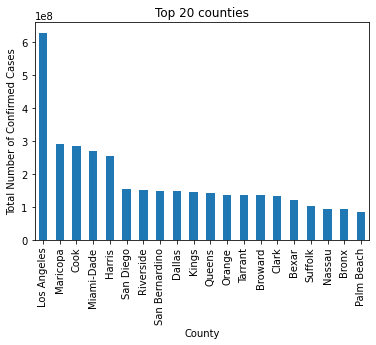

In [24]:
top20 = df_valid_counties.sort_values(by='sum_confirmed', ascending=False).head(20)

top20.plot(kind='bar', x='Admin2', y='sum_confirmed', legend=False)
plt.xlabel('County')
plt.ylabel('Total Number of Confirmed Cases')
plt.title('Top 20 counties')
plt.show()

Show the states of these top 20 counties

In [25]:
top20.loc[:, ['Admin2', 'Province_State', 'sum_confirmed']]

,Admin2,Province_State,sum_confirmed
215,Los Angeles,California,627817651
110,Maricopa,Arizona,291475000
642,Cook,Illinois,284437178
384,Miami-Dade,Florida,270308504
2800,Harris,Texas,255139938
234,San Diego,California,152816464
230,Riverside,California,151695569
233,San Bernardino,California,148341897
2756,Dallas,Texas,146789477
1925,Kings,New York,144644200


Visualize the bottom 20 counties with the least number of the confirmed cases in a bar plot

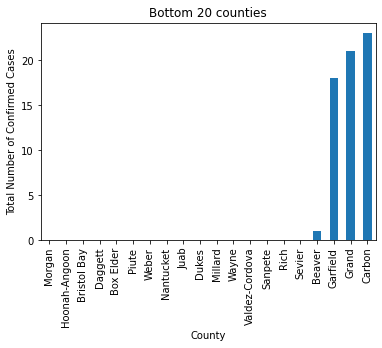

In [26]:
bottom20 = df_valid_counties.sort_values(by='sum_confirmed', ascending=True).head(20)

bottom20.plot(kind='bar', x='Admin2', y='sum_confirmed', legend=False)
plt.xlabel('County')
plt.ylabel('Total Number of Confirmed Cases')
plt.title('Bottom 20 counties')
plt.show()

Show the states of these bottom 20 counties

In [27]:
bottom20.loc[:, ['Admin2', 'Province_State', 'sum_confirmed']]

,Admin2,Province_State,sum_confirmed
2972,Morgan,Utah,0
81,Hoonah-Angoon,Alaska,0
73,Bristol Bay,Alaska,0
2962,Daggett,Utah,0
2958,Box Elder,Utah,0
2974,Piute,Utah,0
2991,Weber,Utah,0
1275,Nantucket,Massachusetts,0
2969,Juab,Utah,0
1268,Dukes,Massachusetts,0


**Observations:**
- Looking at the top 20 counties, we can see that major cities are located in these counties such as Los Angeles in Los Angeles county, Phoenix in Maricopa county, and Chicago in Cook county. 
- The top county Los Angeles had more than twice as large confirmed cases as the second county Maricopa.
- Top 20 counties are in various states such as California, Texas, New York, etc.. On the other hand, the majority of bottom 20 counties (15/20) are in Utah. 
- The bottom 17 counties reported 0 confirmed cases between 1/22/2020 and 2/7/2022. Considering the fact that this observation period is longer than 2 years, it is worth checking quality, accuracy, and sources of these data to make sure this data is trustworthy.

### Choropleth Map by total number of confirmed COVID-19 cases

I will visualize the total number of confirmed COVID-19 cases (sum_confirmed) aggregated to each state in a Choropleth Map.

Group by "Province_State" and aggregate "sum_confirmed"

In [28]:
df_states_aggregate = df_valid_counties.loc[:, ['Province_State', 'sum_confirmed']].groupby('Province_State', as_index=False).sum()
df_states_aggregate

,Province_State,sum_confirmed
0,Alabama,302718296
1,Alaska,42350380
2,American Samoa,1077
3,Arizona,462644683
4,Arkansas,188079529
5,California,1974434916
6,Colorado,279928538
7,Connecticut,168658594
8,Delaware,55383147
9,District of Columbia,27355658


Since Plotly requires to have states in the two letter format (e.g. WA, NE, MN, etc..), I will create a new column 'Code' and assign two-letter-formated state names based on the 'Province_State' column.


References:
- https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html
- https://plotly.com/python/choropleth-maps/
- https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/
- https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd

In [29]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

df_states_aggregate['Code'] = df_states_aggregate['Province_State'].map(code)

Create a Choropleth Map by the total number of confirmed COVID-19 cases for each state

In [30]:
fig = px.choropleth(df_states_aggregate, locations="Code",
                    locationmode="USA-states", color="sum_confirmed",
                    scope="usa", labels={"sum_confirmed": "Total # of COVID-19 Cases"})
 
fig.show()

### Line plots for top 3 counties

Here, I will draw Line plots for top 3 counties to see the change in the number of monthly cases throughout the observation period.

Convert the dataframe from wide to long format to draw the line plots

Reference:
https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [49]:
converted_df = df_monthly_records.melt(id_vars=["County", "State"],
                        var_name="Year-Month",
                        value_name="#Cases")

**Line plot for Los Angeles County, CA**

In [74]:
fig = px.line(x = converted_df.loc[converted_df.County == 'Los Angeles', 'Year-Month'],
              y = converted_df.loc[converted_df.County == 'Los Angeles', '#Cases'],
              title = "Los Angeles County, CA - Total # of Confirmed COVID19 Cases")
fig.update_layout(xaxis_title = "Month Year",
                  yaxis_title = "# of Confirmed COVID19 Cases")
fig.show()

**Line plot for Maricopa county, AZ**

In [75]:
fig = px.line(x = converted_df.loc[converted_df.County == 'Maricopa', 'Year-Month'],
              y = converted_df.loc[converted_df.County == 'Maricopa', '#Cases'],
              title = "Maricopa County, AZ - Total # of Confirmed COVID19 Cases")
fig.update_layout(xaxis_title = "Month Year",
                  yaxis_title = "# of Confirmed COVID19 Cases")
fig.show()

**Line plot for Cook, IL county**

In [76]:
# Since there are 3 states which have Cook county, I need to specify the state as well.

temp_df = converted_df.loc[(converted_df.County == 'Cook') & (converted_df.State == 'Illinois'), ['Year-Month', '#Cases']]
print(len(temp_df))

fig = px.line(temp_df,
              x = 'Year-Month',
              y = '#Cases',
              title = "Maricopa County, IL - Total # of Confirmed COVID19 Cases")
fig.update_layout(xaxis_title = "Month Year",
                  yaxis_title = "# of Confirmed COVID19 Cases")
fig.show()

24
